In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/Real-estate.csv')

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
# Rename the column for readability
modify_column={
    'X1 transaction date':'Transaction date', 
    'X2 house age':'House age',
    'X3 distance to the nearest MRT station': 'Distance',
    'X4 number of convenience stores': 'No. of Stores',
    'X5 latitude':'Latitude',
    'X6 longitude':'Longitude',
    'Y house price of unit area':'Price'
}

In [5]:
df.rename(columns=modify_column, inplace=True)

In [6]:
df.head()

,No,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Drop 'No' column
df.drop(['No'], axis=1, inplace=True)

In [8]:
df.head()

,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
def date_modify(x):
    val=int((x-int(x))*365)
    month_number=val//30
    day_number=val-month_number*30
    if day_number==0: day_number=1
    if month_number!=12: month_number+=1
    return f"{str(day_number).zfill(2)}-{str(month_number).zfill(2)}-{int(x)}"

In [10]:
number=122
str(number).zfill(12)

'000000000122'

In [11]:
# df['Transaction date'].apply(lambda x:int(x))

In [12]:
df['Transaction date']=df['Transaction date'].apply(date_modify)
# df['Transaction date'].apply(date_modify)

In [13]:
df.head()

,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
0,04-12-2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,04-12-2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,02-08-2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,02-07-2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,04-11-2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
def data_split(df,test_size_percentage=0.2):
    test_size=int(df.shape[0]*test_size_percentage)
    test_data = df.sample(n=test_size, random_state=42)
    train_data = df[~df.isin(test_data)].dropna()
    return train_data, test_data

In [15]:
train_data, test_data=data_split(df)

In [16]:
train_data

,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
1,04-12-2012,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,02-08-2013,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,02-07-2013,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,04-11-2012,5.0,390.56840,5.0,24.97937,121.54245,43.1
5,03-09-2012,7.1,2175.03000,3.0,24.96305,121.51254,32.1
...,...,...,...,...,...,...,...
408,02-06-2013,18.5,2175.74400,3.0,24.96330,121.51243,28.1
410,03-09-2012,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,01-04-2013,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,01-01-2013,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [17]:
X_train=train_data.drop('Price', axis=1)
X_test=test_data.drop('Price', axis=1)
y_train=train_data['Price']
y_test=test_data['Price']

In [18]:
y_train

1      42.2
2      47.3
3      54.8
4      43.1
5      32.1
       ... 
408    28.1
410    50.0
411    40.6
412    52.5
413    63.9
Name: Price, Length: 332, dtype: float64

In [19]:
train_data

,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
1,04-12-2012,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,02-08-2013,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,02-07-2013,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,04-11-2012,5.0,390.56840,5.0,24.97937,121.54245,43.1
5,03-09-2012,7.1,2175.03000,3.0,24.96305,121.51254,32.1
...,...,...,...,...,...,...,...
408,02-06-2013,18.5,2175.74400,3.0,24.96330,121.51243,28.1
410,03-09-2012,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,01-04-2013,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,01-01-2013,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [28]:
pd.concat([X_train, y_train], axis=1)

,No,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
5,6.0,2012.667,7.1,2175.03000,3.0,24.96305,121.51254,32.1
...,...,...,...,...,...,...,...,...
408,409.0,2013.417,18.5,2175.74400,3.0,24.96330,121.51243,28.1
410,411.0,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,412.0,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,413.0,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [20]:
class Standard:
    def __init__(self):
        self.mean=None
        self.std=None
        
    def train_standardization(self,X):
        n=X.shape[1]
        X_mean=np.zeros(n)
        X_std=np.zeros(n)
        for i in range(n):
            mean=np.mean(X.iloc[:,i])
            std=np.std(X.iloc[:,i])
            X_mean[i]=mean
            X_std[i]=std
        self.mean=X_mean
        self.std=X_std
        X_standardized=(X-X_mean)/X_std   
        return X_standardized
    
    def test_standardize(self,X):
        X_standardized=(X-self.mean)/self.std 
        return X_standardized

In [21]:
scaler=Standard()

In [22]:
train_data

,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude,Price
1,04-12-2012,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,02-08-2013,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,02-07-2013,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,04-11-2012,5.0,390.56840,5.0,24.97937,121.54245,43.1
5,03-09-2012,7.1,2175.03000,3.0,24.96305,121.51254,32.1
...,...,...,...,...,...,...,...
408,02-06-2013,18.5,2175.74400,3.0,24.96330,121.51243,28.1
410,03-09-2012,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,01-04-2013,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,01-01-2013,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [22]:
train_data.iloc[:,1:-1]

,Transaction date,House age,Distance,No. of Stores,Latitude,Longitude
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245
5,2012.667,7.1,2175.03000,3.0,24.96305,121.51254
...,...,...,...,...,...,...
408,2013.417,18.5,2175.74400,3.0,24.96330,121.51243
410,2012.667,5.6,90.45606,9.0,24.97433,121.54310
411,2013.250,18.8,390.96960,7.0,24.97923,121.53986
412,2013.000,8.1,104.81010,5.0,24.96674,121.54067


In [23]:
import numpy as np
X_train=scaler.train_standardization(X_train.iloc[:,1:])
X_train

,House age,Distance,No. of Stores,Latitude,Longitude
1,0.197265,-0.620829,1.649063,0.885941,0.373249
2,-0.351526,-0.410522,0.293053,1.456334,0.667526
3,-0.351526,-0.410522,0.293053,1.456334,0.667526
4,-1.086197,-0.551679,0.293053,0.808233,0.569880
5,-0.900317,0.917779,-0.384951,-0.499186,-1.430536
...,...,...,...,...,...
408,0.108750,0.918367,-0.384951,-0.479158,-1.437893
410,-1.033089,-0.798814,1.649063,0.404471,0.613353
411,0.135305,-0.551349,0.971058,0.797017,0.396658
412,-0.811802,-0.786993,0.293053,-0.203575,0.450831


In [24]:
X_test=scaler.test_standardize(X_test.iloc[:,1:])
X_test

,House age,Distance,No. of Stores,Latitude,Longitude
358,-1.431404,-0.713890,0.632056,-0.286089,0.465545
350,-0.360377,-0.467962,0.293053,-0.330952,0.230124
373,-1.528771,-0.647658,-1.062956,0.442123,-0.223331
399,-0.404635,-0.733205,-1.062956,0.354802,-0.273492
369,0.259225,0.926094,-0.384951,-0.485567,-1.441906
...,...,...,...,...,...
405,0.507066,-0.765431,0.632056,-1.013501,0.248850
31,1.091263,-0.239718,0.971058,1.083816,0.010085
283,1.436470,0.756082,-0.723954,1.398654,-1.035937
157,-0.103685,-0.201403,-0.045949,0.767376,0.047538


In [109]:
df['House age']/df['House age'].max()

0      0.730594
1      0.445205
2      0.303653
3      0.303653
4      0.114155
         ...   
409    0.312785
410    0.127854
411    0.429224
412    0.184932
413    0.148402
Name: House age, Length: 414, dtype: float64

In [110]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

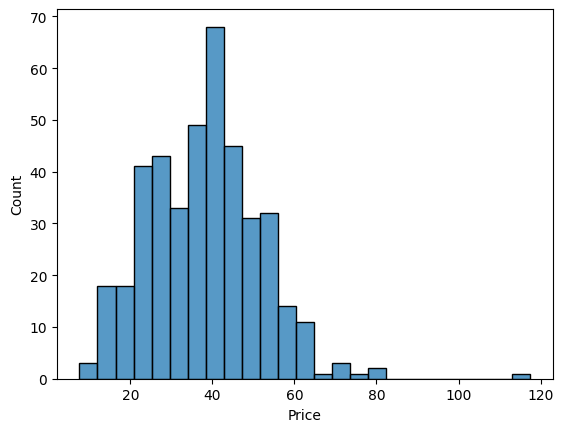

In [121]:
sns.histplot(df['Price'], bins=25)

In [25]:
class LinearRegression:
    def __init__(self):
        self._weight=None
        self._bias=None
        self._cost=None
    
    @property
    def weight(self):
        return self._weight
    
    @property
    def bias(self):
        return self._bias
    
    @property
    def cost(self):
        return self._cost
    
    def calculate_cost(self,X,y,W,b):   #3rd write this function
        m=X.shape[0]
        err_sum=0
        for i in range(m):
            err_sum = err_sum + (np.dot(W, X[i,:])+b -y[i])**2
        loss=(1/2*m)*err_sum    
        return loss

    def calculate_gradient(self,XQ,y,W,b):         #1st write this function
        m=XQ.shape[0]
        n=XQ.shape[1]
        grad_sum_b=0
        grad_sum_W=np.zeros(n)
        for i in range(m):
            grad_sum_b = grad_sum_b + np.dot(W, XQ[i,:]) +b - y[i]
            for j in range(n):
                grad_sum_W[j] = grad_sum_W[j] + (np.dot(W, XQ[i,:]) +b -y[i])*XQ[i,j]
        return grad_sum_W, grad_sum_b

    def gradient_descent(self,X,y, iterations, alpha):         #2nd write this function
        n=X.shape[1]
        m=X.shape[0]
        W=np.random.random_sample(n)
        b=np.random.randint(100)
        cost=np.zeros(iterations)
        for i in range(iterations):
            temp_b=0
            temp_W=np.zeros(n)
            temp_b=b-(alpha/m)*self.calculate_gradient(X, y, W, b)[1]
            temp_W=W-(alpha/m)*self.calculate_gradient(X, y, W, b)[0]
            b=temp_b
            W=temp_W
            cost[i]=self.calculate_cost(X, y, W, b)
        self._weight=W
        self._bias=b
        self._cost=cost
        
    def fit(self, X,y, iterations=100, alpha=0.11):
        self.gradient_descent(X, y, iterations, alpha)
    
    def predict(self, X):
        predicted=np.dot(X,self._weight) + self._bias
        return predicted
    

In [26]:
reg=LinearRegression()

In [27]:
import numpy as np
reg.fit(X_train.values, y_train.values)

In [28]:
y_pred=reg.predict(X_test.values)

In [29]:
y_pred

array([47.57091318, 41.77728302, 44.04389456, 40.7690504 , 30.13928632,
       42.93212129, 46.04617309, 45.9649913 , 24.32711495, 52.08732185,
       31.98142799, 34.62176184, 39.53232032, 24.44168787, 35.73232378,
       32.71545948, 42.03009681, 46.62987647, 31.41344291, 44.54727815,
        2.75999387, 33.43133265, 47.81315414, 43.47830972, 14.16702212,
       40.73927941, 14.80875705, 44.04389456, 35.90433474, 37.85829737,
       11.8147641 , 39.00773059, 37.76692152, 28.74633644, 45.99936047,
       31.13984116, 52.27674601, 15.25715259, 47.04731292, 40.51623327,
       36.1234075 , 40.4926888 , 48.52902487, 39.76383953, 41.83140421,
       48.34285675, 45.22987162, 24.43507949, 49.81403775, 48.28042335,
       47.57091318, 48.63712187, 41.04832603, 42.56285077, 36.16853875,
       15.23009199, 34.94865117, 36.84465868, 30.05810454, 45.9649913 ,
       33.54844387, 32.41720349, 15.23009199, 12.01287779,  9.36192973,
       33.45839324, 29.92075122, 45.45768332, 33.99164762, 30.65

In [30]:
# Metrics 
def mae(act,pred):
    diff=act-pred
    n=diff.shape[0]
    val=np.abs(diff)/n
    return val.sum()
def mse(act,pred):
    diff=act-pred
    square_diff=diff**2
    n=diff.shape[0]
    return square_diff.sum()/n
def rmse(act, pred):
    return np.sqrt(mse(act,pred))
def r2_score(act, pred):
    diff=act-pred
    diff=diff**2
    rss=diff.sum()
    diff2=act-np.mean(act)
    diff2=diff2**2
    tss=diff2.sum()
    score=1-(rss)/(tss)
    return score
def adjusted_r2_score(act, pred):
    r2=r2_score(act, pred)
    n=act.shape[0]
    p=X_train.shape[1]
    score=1-(1-r2)*(n-1)/(n-p-1)
    return score
def mape(act, pred): #mean_absolute_percentage_error
    n=act.shape[0]
    diff_frac=np.abs(act-pred)/act
    sum=diff_frac.sum()
    return sum/n
def med_ae(act, pred):   # median_absolute_error
    abs_val=np.abs(act-pred)
    return np.median(abs_val)

In [38]:
r2_score(y_test, y_pred)

0.6762415563025279

In [ ]:
# class

In [32]:
import pickle
# from sklearn.linear_model import LinearRegression

# Assuming you have already trained your linear regression model
# and saved it in a variable named 'model'
# Example:
# model = LinearRegression()
# model.fit(X_train, y_train)

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(reg, file)

# Later, you can load the model from the file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model to make predictions
# Example:
# loaded_model.predict(X_test)


In [33]:
loaded_model.predict(X_test)

array([47.57091318, 41.77728302, 44.04389456, 40.7690504 , 30.13928632,
       42.93212129, 46.04617309, 45.9649913 , 24.32711495, 52.08732185,
       31.98142799, 34.62176184, 39.53232032, 24.44168787, 35.73232378,
       32.71545948, 42.03009681, 46.62987647, 31.41344291, 44.54727815,
        2.75999387, 33.43133265, 47.81315414, 43.47830972, 14.16702212,
       40.73927941, 14.80875705, 44.04389456, 35.90433474, 37.85829737,
       11.8147641 , 39.00773059, 37.76692152, 28.74633644, 45.99936047,
       31.13984116, 52.27674601, 15.25715259, 47.04731292, 40.51623327,
       36.1234075 , 40.4926888 , 48.52902487, 39.76383953, 41.83140421,
       48.34285675, 45.22987162, 24.43507949, 49.81403775, 48.28042335,
       47.57091318, 48.63712187, 41.04832603, 42.56285077, 36.16853875,
       15.23009199, 34.94865117, 36.84465868, 30.05810454, 45.9649913 ,
       33.54844387, 32.41720349, 15.23009199, 12.01287779,  9.36192973,
       33.45839324, 29.92075122, 45.45768332, 33.99164762, 30.65

In [35]:
y_pred

array([47.57091318, 41.77728302, 44.04389456, 40.7690504 , 30.13928632,
       42.93212129, 46.04617309, 45.9649913 , 24.32711495, 52.08732185,
       31.98142799, 34.62176184, 39.53232032, 24.44168787, 35.73232378,
       32.71545948, 42.03009681, 46.62987647, 31.41344291, 44.54727815,
        2.75999387, 33.43133265, 47.81315414, 43.47830972, 14.16702212,
       40.73927941, 14.80875705, 44.04389456, 35.90433474, 37.85829737,
       11.8147641 , 39.00773059, 37.76692152, 28.74633644, 45.99936047,
       31.13984116, 52.27674601, 15.25715259, 47.04731292, 40.51623327,
       36.1234075 , 40.4926888 , 48.52902487, 39.76383953, 41.83140421,
       48.34285675, 45.22987162, 24.43507949, 49.81403775, 48.28042335,
       47.57091318, 48.63712187, 41.04832603, 42.56285077, 36.16853875,
       15.23009199, 34.94865117, 36.84465868, 30.05810454, 45.9649913 ,
       33.54844387, 32.41720349, 15.23009199, 12.01287779,  9.36192973,
       33.45839324, 29.92075122, 45.45768332, 33.99164762, 30.65